<a href="https://colab.research.google.com/github/Samra771/samrasana/blob/main/Breast_and_Brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Explain the error in the provided Python code snippet that downloads a dataset using `kagglehub`. Then, provide a complete Python code solution that utilizes the downloaded "khaledhellmy/brain-breast-tumor" dataset to build, train, and evaluate a Convolutional Neural Network (CNN) for tumor prediction. The solution should include data preprocessing, model building, training, and evaluation with a classification matrix and accuracy score.

## Data preprocessing

### Subtask:
Load and preprocess the images for the CNN model. This will involve resizing images, converting them to numerical arrays, and splitting the data into training and testing sets.


**Reasoning**:
Download the dataset using kagglehub and initialize empty lists for images and labels.



In [ ]:
import kagglehub
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Download the dataset
dataset_id = 'khaledhellmy/brain-breast-tumor'
download_dir = 'tumor_dataset'
kagglehub.dataset_download(dataset_id, download_dir)

# Initialize lists for images and labels
images = []
labels = []

ValueError: 'tumor_dataset' is not present in the dataset files. You can access the other files of the attached dataset at '/kaggle/input/brain-breast-tumor'

**Reasoning**:
The error indicates that the dataset is already available at '/kaggle/input/brain-breast-tumor'. Modify the code to use this path instead of trying to download it again. Then, iterate through the dataset directory, load, resize, and convert images to NumPy arrays, and store them along with their labels.



In [ ]:
# Use the provided path to the dataset
dataset_path = '/kaggle/input/brain-breast-tumor'

# Initialize lists for images and labels
images = []
labels = []

# Define image dimensions
img_width, img_height = 128, 128

# Iterate through the dataset directory
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        for image_name in os.listdir(category_path):
            image_path = os.path.join(category_path, image_name)
            try:
                # Load the image
                img = cv2.imread(image_path)
                # Resize the image
                img = cv2.resize(img, (img_width, img_height))
                # Convert to NumPy array and append
                images.append(np.array(img))
                # Append the label
                labels.append(category)
            except Exception as e:
                print(f"Error loading image {image_path}: {e}")

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Normalize image data
images = images / 255.0

# Convert labels to categorical
unique_labels = np.unique(labels)
label_map = {label: i for i, label in enumerate(unique_labels)}
numerical_labels = np.array([label_map[label] for label in labels])
categorical_labels = to_categorical(numerical_labels, num_classes=len(unique_labels))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, categorical_labels, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

Error loading image /kaggle/input/brain-breast-tumor/Dataset/Brain scans: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Error loading image /kaggle/input/brain-breast-tumor/Dataset/Breast scans: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



ValueError: zero-size array to reduction operation maximum which has no identity

**Reasoning**:
The errors indicate that some entries in the dataset directory are not valid image files, causing issues during loading and resizing, and subsequently leading to an empty labels list. Modify the code to check if the loaded image is not None before proceeding with resizing and appending to the lists.



In [ ]:
# Use the provided path to the dataset
dataset_path = '/kaggle/input/brain-breast-tumor'

# Initialize lists for images and labels
images = []
labels = []

# Define image dimensions
img_width, img_height = 128, 128

# Iterate through the dataset directory
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        for image_name in os.listdir(category_path):
            image_path = os.path.join(category_path, image_name)
            try:
                # Load the image
                img = cv2.imread(image_path)
                # Check if the image was loaded successfully
                if img is not None:
                    # Resize the image
                    img = cv2.resize(img, (img_width, img_height))
                    # Convert to NumPy array and append
                    images.append(np.array(img))
                    # Append the label
                    labels.append(category)
                else:
                    print(f"Could not load image: {image_path}")
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Normalize image data
images = images / 255.0

# Convert labels to categorical
if len(labels) > 0:
    unique_labels = np.unique(labels)
    label_map = {label: i for i, label in enumerate(unique_labels)}
    numerical_labels = np.array([label_map[label] for label in labels])
    categorical_labels = to_categorical(numerical_labels, num_classes=len(unique_labels))

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(images, categorical_labels, test_size=0.2, random_state=42)

    print(f"Training data shape: {X_train.shape}")
    print(f"Testing data shape: {X_test.shape}")
    print(f"Training labels shape: {y_train.shape}")
    print(f"Testing labels shape: {y_test.shape}")
else:
    print("No images were loaded successfully.")

Could not load image: /kaggle/input/brain-breast-tumor/Dataset/Brain scans
Could not load image: /kaggle/input/brain-breast-tumor/Dataset/Breast scans
No images were loaded successfully.


**Reasoning**:
The previous attempt failed because the code was trying to read directories as image files. The dataset structure likely has subdirectories for each class containing the actual images. Modify the code to iterate through the dataset path and its subdirectories to find and load image files.



In [ ]:
# Use the provided path to the dataset
base_path = "/root/.cache/kagglehub/datasets/khaledhellmy/brain-breast-tumor/versions/1"
dataset_path=[
    (f"{base_path}/Dataset/Brain scans/No tumor/Train", "No tumor", "Train"),
    (f"{base_path}/Dataset/Brain scans/No tumor/Test", "No tumor", "Test"),
    (f"{base_path}/Dataset/Brain scans/Tumor/TRAIN", "Tumor", "Train"),
    (f"{base_path}/Dataset/Brain scans/Tumor/TEST", "Tumor", "Test"),
    (f"{base_path}/Dataset/Breast scans/benign/Train", "benign", "Train"),
    (f"{base_path}/Dataset/Breast scans/benign/Test", "benign", "Test"),
    (f"{base_path}/Dataset/Breast scans/malignant/Train", "malignant", "Train"),
    (f"{base_path}/Dataset/Breast scans/malignant/Test", "malignant", "Test"),
    (f"{base_path}/Dataset/Breast scans/normal/Train", "normal", "Train"),
    (f"{base_path}/Dataset/Breast scans/normal/Test", "normal", "Test")
 ]

In [ ]:
def collect_image_data():
    image_paths = []
    labels = []
    splits = []
    for path, label, split in dataset_path:
        if not os.path.exists(path):
            print(f"Warning: Directory {path} does not exist.")
            continue
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            if os.path.isfile(img_path) and img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_paths.append(img_path)
                labels.append(label)
                splits.append(split)
    return image_paths, labels, splits

image_paths, labels, splits = collect_image_data()
df = pd.DataFrame({
    'image_path': image_paths,
    'label': labels,
    'split': splits
})
display(df.head())

,image_path,label,split
0,/root/.cache/kagglehub/datasets/khaledhellmy/b...,No tumor,Train
1,/root/.cache/kagglehub/datasets/khaledhellmy/b...,No tumor,Train
2,/root/.cache/kagglehub/datasets/khaledhellmy/b...,No tumor,Train
3,/root/.cache/kagglehub/datasets/khaledhellmy/b...,No tumor,Train
4,/root/.cache/kagglehub/datasets/khaledhellmy/b...,No tumor,Train


In [ ]:
df.tail()

,image_path,label,split
2640,/root/.cache/kagglehub/datasets/khaledhellmy/b...,normal,Test
2641,/root/.cache/kagglehub/datasets/khaledhellmy/b...,normal,Test
2642,/root/.cache/kagglehub/datasets/khaledhellmy/b...,normal,Test
2643,/root/.cache/kagglehub/datasets/khaledhellmy/b...,normal,Test
2644,/root/.cache/kagglehub/datasets/khaledhellmy/b...,normal,Test


In [ ]:
 df.shape

(2645, 3)

In [ ]:
df.columns

Index(['image_path', 'label', 'split'], dtype='object')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
 df.isnull().sum()

,0
image_path,0
label,0
split,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2645 entries, 0 to 2644
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  2645 non-null   object
 1   label       2645 non-null   object
 2   split       2645 non-null   object
dtypes: object(3)
memory usage: 62.1+ KB


In [ ]:
df['label'].unique()

array(['No tumor', 'Tumor', 'benign', 'malignant', 'normal'], dtype=object)

In [ ]:
df['label'].value_counts()

,count
label,
benign,891
No tumor,601
Tumor,600
malignant,420
normal,133


/tmp/ipython-input-43-3471021142.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="label", palette="viridis", ax=ax)


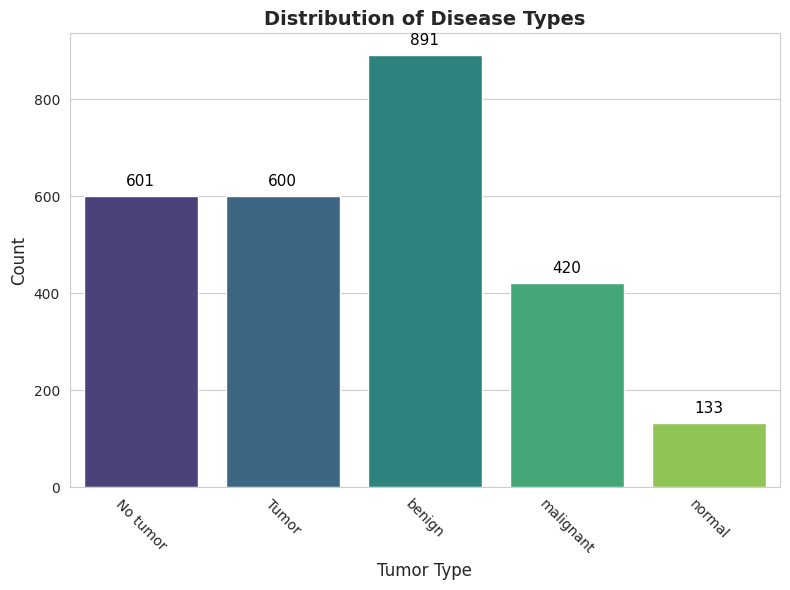

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=df, x="label", palette="viridis", ax=ax)
ax.set_title("Distribution of Disease Types", fontsize=14,
fontweight='bold')
ax.set_xlabel("Tumor Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='bottom',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=11,
                color='black')
plt.xticks(rotation=-45)
plt.tight_layout()
plt.show()

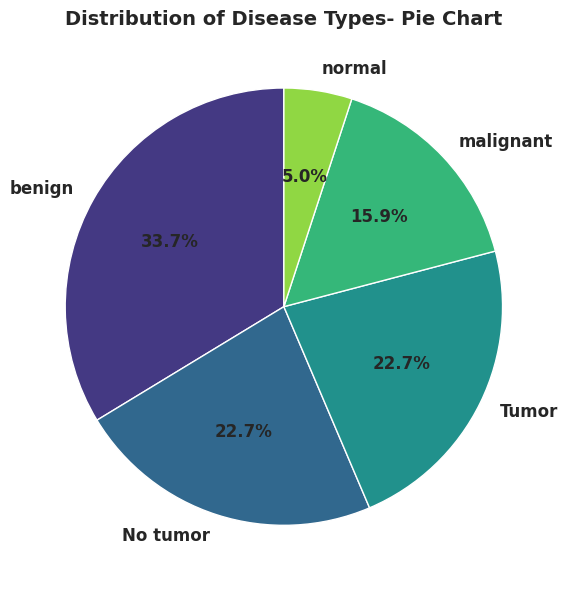

In [ ]:
label_counts =df[ "label" ].value_counts()
fig, ax =plt.subplots(figsize=(8, 6))
colors = sns.color_palette("viridis", len(label_counts))
ax.pie(label_counts, labels=label_counts.index, colors=colors, autopct='%1.1f%%', startangle=90 , textprops={'fontsize':12, 'weight':'bold'}),
wedgeprops={'linewidth': 1, 'edgecolor': 'black'},
ax.set_title("Distribution of Disease Types- Pie Chart", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

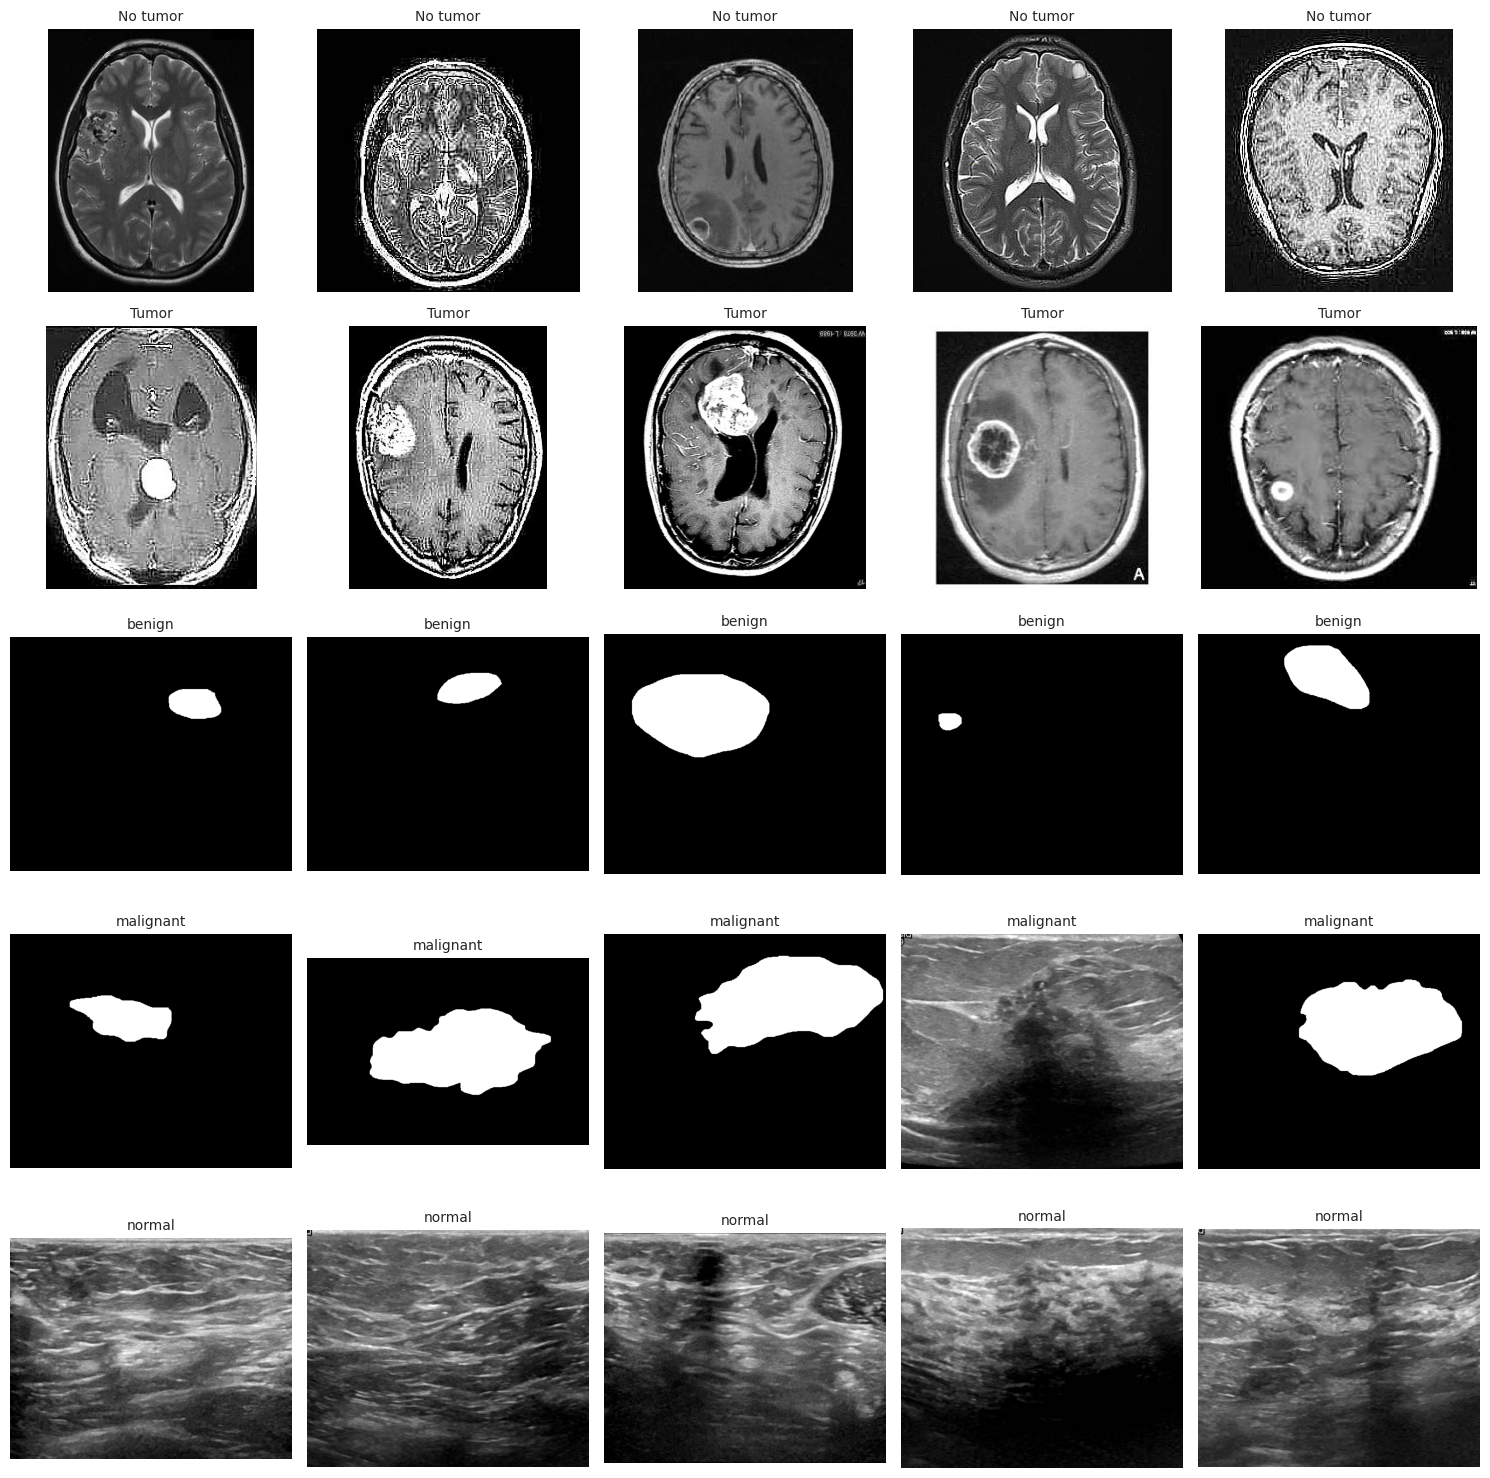

In [ ]:
import cv2
categories = df['label'].unique()
n_cols = 5
n_rows = len(categories)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3
 , n_rows * 3))
if n_rows == 1:
 axes = axes
else:
  axes = axes.flatten()
plot_idx = 0
for category in categories:
    category_paths = df[df['label'] == category]['image_path'].head(5).tolist()
    for img_path in category_paths:
        if plot_idx < len(axes):
            try:
                img = cv2.imread(img_path)
                if img is None:
                    axes[plot_idx].text(0.5, 0.5, 'Image not found',
                                        ha='center', va='center',
transform=axes[plot_idx].transAxes)
                else:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    axes[plot_idx].imshow(img)
                axes[plot_idx].set_title(category, fontsize=10)
                axes[plot_idx].axis('off')
            except:
                axes[plot_idx].text(0.5, 0.5, 'Error loading',
                                    ha='center', va='center',
transform=axes[plot_idx].transAxes)
            plot_idx += 1

    while len(category_paths) < 5 and plot_idx < len(axes):
        axes[plot_idx].text(0.5, 0.5, 'No image',
                            ha='center', va='center',
transform=axes[plot_idx].transAxes)
        axes[plot_idx].set_title(category, fontsize=10)
        axes[plot_idx].axis('off')
        plot_idx += 1
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.utils import resample
categories =df['label'].unique()
max_count = df['label'].value_counts().max()
df_balanced = pd.DataFrame()
for category in categories:
    category_df = df[df['label'] == category]
    category_df_balanced = resample(category_df,
                                    replace=True,
                                    n_samples=max_count,
                                    random_state=42)
    df_balanced = pd.concat([df_balanced, category_df_balanced])
df = df_balanced.reset_index(drop=True)
df_balanced = df_balanced.sample(frac=1,
random_state=42).reset_index(drop=True)
print(df_balanced['label'].value_counts())
df = df_balanced



label
malignant    891
No tumor     891
Tumor        891
normal       891
benign       891
Name: count, dtype: int64


Epoch 1/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 39s 305ms/step - accuracy: 0.5671 - loss: 2.6146 - val_accuracy: 0.2323 - val_loss: 9.6211
Epoch 2/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 35s 307ms/step - accuracy: 0.7596 - loss: 0.5768 - val_accuracy: 0.2828 - val_loss: 9.4081
Epoch 3/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 41s 309ms/step - accuracy: 0.8569 - loss: 0.3685 - val_accuracy: 0.5006 - val_loss: 3.9400
Epoch 4/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 41s 301ms/step - accuracy: 0.8990 - loss: 0.2687 - val_accuracy: 0.6846 - val_loss: 1.2555
Epoch 5/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 40s 299ms/step - accuracy: 0.9087 - loss: 0.2298 - val_accuracy: 0.8316 - val_loss: 0.6778
Epoch 6/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 41s 307ms/step - accuracy: 0.9302 - loss: 0.1777 - val_accuracy: 0.9057 - val_loss: 0.2635
Epoch 7/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 40s 301ms/step - accuracy: 0.9577 - loss: 0.1377 - val_accuracy: 0.9360 - val_loss: 0.1945
Epoch 8/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 42s 312ms/step - accuracy: 0.9627 - loss: 0

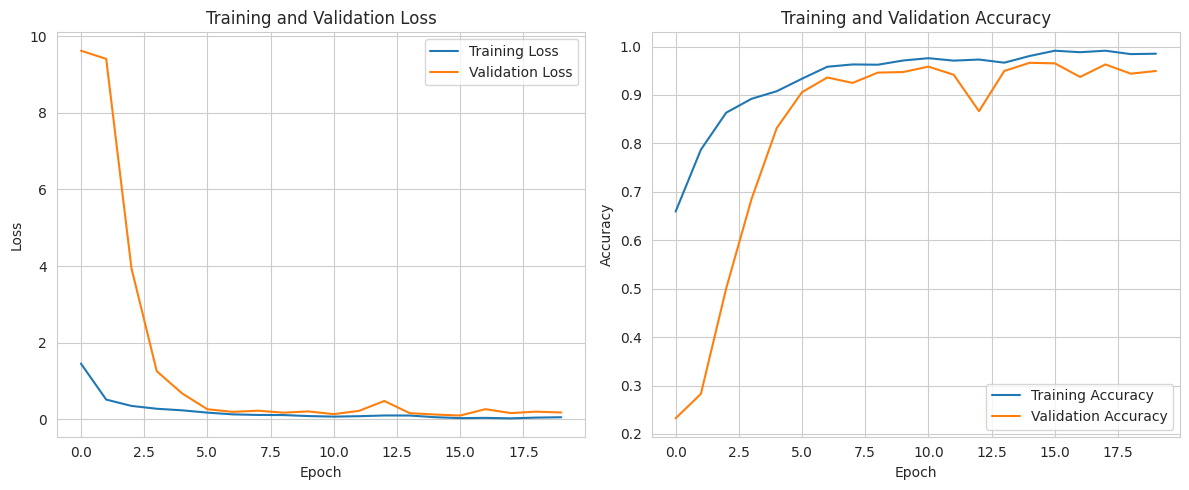

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step


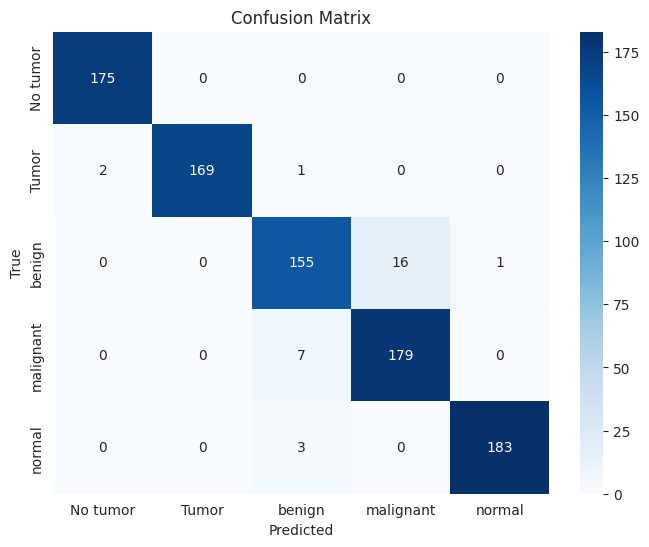


Classification Report:
              precision    recall  f1-score   support

    No tumor       0.99      1.00      0.99       175
       Tumor       1.00      0.98      0.99       172
      benign       0.93      0.90      0.92       172
   malignant       0.92      0.96      0.94       186
      normal       0.99      0.98      0.99       186

    accuracy                           0.97       891
   macro avg       0.97      0.97      0.97       891
weighted avg       0.97      0.97      0.97       891

Validation Accuracy: 0.9663


In [ ]:
df = df[['image_path', 'label']]
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import class_weight
image_paths = df['image_path'].values
labels = df['label'].values
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_onehot = tf.keras.utils.to_categorical(labels_encoded,
num_classes=len(label_encoder.classes_))
class_names = label_encoder.classes_

def load_and_preprocess_image(path):
    try:
        img = load_img(path, target_size=(64, 64))
        img = img_to_array(img) / 255.0
        return img
    except:
        return np.zeros((64, 64, 3))
images = np.array([load_and_preprocess_image(path) for path in
image_paths])
X_train, X_val, y_train, y_val = train_test_split(images,
labels_onehot, test_size=0.2, random_state=42)
class_weights = class_weight.compute_class_weight('balanced',
classes=np.unique(labels_encoded), y=labels_encoded)
class_weights = dict(enumerate(class_weights))

def augment_image(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)
    angle = tf.random.uniform([], -0.1745, 0.1745)
    image = tf.image.rot90(image, k=tf.cast(tf.math.floor(angle /
(np.pi / 2)), tf.int32))
    return image, label
train_dataset = tf.data.Dataset.from_tensor_slices((X_train,
y_train)).map(augment_image,
num_parallel_calls=tf.data.AUTOTUNE).batch(32).shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val,
y_val)).batch(32).prefetch(tf.data.AUTOTUNE)

model = Sequential([
    Input(shape=(64, 64, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy',
metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5,
restore_best_weights=True)
history = model.fit(train_dataset, validation_data=val_dataset,
epochs=50, class_weight=class_weights, callbacks=[early_stopping])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

val_predictions = model.predict(X_val)
val_predictions = np.argmax(val_predictions, axis=1)
val_true = np.argmax(y_val, axis=1)
cm = confusion_matrix(val_true, val_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

print("\nClassification Report:")
print(classification_report(val_true, val_predictions, target_names=class_names))
accuracy = accuracy_score(val_true, val_predictions)
print(f"Validation Accuracy: {accuracy:.4f}")